<a href="https://colab.research.google.com/gist/janlukasschroeder/3da274150fd00c1c1776c7e541a9b61b/extracting-financial-statements-from-sec-filings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Financial Statements from SEC Filings - XBRL-To-JSON

This is the entire Jupyter notebook to extract financial statements from annual and quarterly reports as reported in 10-K and 10-Q filings with the SEC.

We use https://sec-api.io to get all 10-K and 10-Q filings and to convert their XBRL data into JSON so that we can create a single income statement, balance sheet and cash flow statement for Apple, covering quarterly financial data over multiple years.

Medium article:
https://medium.com/@jan_5421/extracting-financial-statements-from-sec-filings-xbrl-to-json-f83542ade90

In [1]:
# uncomment the next line to install the SEC API Python package
# pip install sec-api

In [2]:
# get your free API key at https://sec-api.io
api_key = ""

In [3]:
import requests
import json
import pandas as pd

# 10-Q filing URL of Apple
filing_url = "https://www.sec.gov/Archives/edgar/data/320193/000032019321000056/aapl-20210327.htm"

# XBRL-to-JSON converter API endpoint
xbrl_converter_api_endpoint = "https://api.sec-api.io/xbrl-to-json"

final_url = xbrl_converter_api_endpoint + "?htm-url=" + filing_url + "&token=" + api_key

# make request to the API
response = requests.get(final_url)

# load JSON into memory
xbrl_json = json.loads(response.text)

# income statement example
print(json.dumps(xbrl_json['StatementsOfIncome']))

{"RevenueFromContractWithCustomerExcludingAssessedTax": [{"decimals": "-6", "unitRef": "usd", "period": {"startDate": "2020-12-27", "endDate": "2021-03-27"}, "segment": {"dimension": "srt:ProductOrServiceAxis", "value": "us-gaap:ProductMember"}, "value": "72683000000"}, {"decimals": "-6", "unitRef": "usd", "period": {"startDate": "2019-12-29", "endDate": "2020-03-28"}, "segment": {"dimension": "srt:ProductOrServiceAxis", "value": "us-gaap:ProductMember"}, "value": "44965000000"}, {"decimals": "-6", "unitRef": "usd", "period": {"startDate": "2020-09-27", "endDate": "2021-03-27"}, "segment": {"dimension": "srt:ProductOrServiceAxis", "value": "us-gaap:ProductMember"}, "value": "168361000000"}, {"decimals": "-6", "unitRef": "usd", "period": {"startDate": "2019-09-29", "endDate": "2020-03-28"}, "segment": {"dimension": "srt:ProductOrServiceAxis", "value": "us-gaap:ProductMember"}, "value": "124069000000"}, {"decimals": "-6", "unitRef": "usd", "period": {"startDate": "2020-12-27", "endDate":

In [4]:
# convert XBRL-JSON of income statement to pandas dataframe
def get_income_statement(xbrl_json):
    income_statement_store = {}

    # iterate over each US GAAP item in the income statement
    for usGaapItem in xbrl_json['StatementsOfIncome']:
        values = []
        indicies = []

        for fact in xbrl_json['StatementsOfIncome'][usGaapItem]:
            # only consider items without segment. not required for our analysis.
            if 'segment' not in fact:
                index = fact['period']['startDate'] + '-' + fact['period']['endDate']
                # ensure no index duplicates are created
                if index not in indicies:
                    values.append(fact['value'])
                    indicies.append(index)                    

        income_statement_store[usGaapItem] = pd.Series(values, index=indicies) 

    income_statement = pd.DataFrame(income_statement_store)
    # switch columns and rows so that US GAAP items are rows and each column header represents a date range
    return income_statement.T 

income_statement = get_income_statement(xbrl_json)

In [5]:
income_statement

,2020-12-27-2021-03-27,2019-12-29-2020-03-28,2020-09-27-2021-03-27,2019-09-29-2020-03-28
RevenueFromContractWithCustomerExcludingAssessedTax,89584000000,58313000000,201023000000,150132000000
CostOfGoodsAndServicesSold,51505000000,35943000000,118616000000,92545000000
GrossProfit,38079000000,22370000000,82407000000,57587000000
ResearchAndDevelopmentExpense,5262000000,4565000000,10425000000,9016000000
SellingGeneralAndAdministrativeExpense,5314000000,4952000000,10945000000,10149000000
OperatingExpenses,10576000000,9517000000,21370000000,19165000000
OperatingIncomeLoss,27503000000,12853000000,61037000000,38422000000
NonoperatingIncomeExpense,508000000,282000000,553000000,631000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,28011000000,13135000000,61590000000,39053000000
IncomeTaxExpenseBenefit,4381000000,1886000000,9205000000,5568000000


In [6]:

# convert XBRL-JSON of balance sheet to pandas dataframe
def get_balance_sheet(xbrl_json):
    balance_sheet_store = {}

    for usGaapItem in xbrl_json['BalanceSheets']:
        values = []
        indicies = []

        for fact in xbrl_json['BalanceSheets'][usGaapItem]:
            # only consider items without segment.
            if 'segment' not in fact:
                index = fact['period']['instant']

                # avoid duplicate indicies with same values
                if index in indicies:
                    continue
                    
                # add 0 if value is nil
                if "value" not in fact:
                    values.append(0)
                else:
                    values.append(fact['value'])

                indicies.append(index)                    

            balance_sheet_store[usGaapItem] = pd.Series(values, index=indicies) 

    balance_sheet = pd.DataFrame(balance_sheet_store)
    # switch columns and rows so that US GAAP items are rows and each column header represents a date instant
    return balance_sheet.T

balance_sheet = get_balance_sheet(xbrl_json)

In [7]:
balance_sheet

,2019-09-28,2019-12-28,2020-03-28,2020-09-26,2020-12-26,2021-03-27
CashAndCashEquivalentsAtCarryingValue,NaN,NaN,NaN,38016000000,NaN,38466000000
MarketableSecuritiesCurrent,NaN,NaN,NaN,52927000000,NaN,31368000000
AccountsReceivableNetCurrent,NaN,NaN,NaN,16120000000,NaN,18503000000
InventoryNet,NaN,NaN,NaN,4061000000,NaN,5219000000
NontradeReceivablesCurrent,NaN,NaN,NaN,21325000000,NaN,14533000000
OtherAssetsCurrent,NaN,NaN,NaN,11264000000,NaN,13376000000
AssetsCurrent,NaN,NaN,NaN,143713000000,NaN,121465000000
MarketableSecuritiesNoncurrent,NaN,NaN,NaN,100887000000,NaN,134539000000
PropertyPlantAndEquipmentNet,NaN,NaN,NaN,36766000000,NaN,37815000000
OtherAssetsNoncurrent,NaN,NaN,NaN,42522000000,NaN,43339000000


In [8]:
balance_sheet.T

,CashAndCashEquivalentsAtCarryingValue,MarketableSecuritiesCurrent,AccountsReceivableNetCurrent,InventoryNet,NontradeReceivablesCurrent,OtherAssetsCurrent,AssetsCurrent,MarketableSecuritiesNoncurrent,PropertyPlantAndEquipmentNet,OtherAssetsNoncurrent,...,LongTermDebtNoncurrent,OtherLiabilitiesNoncurrent,LiabilitiesNoncurrent,Liabilities,CommitmentsAndContingencies,CommonStocksIncludingAdditionalPaidInCapital,RetainedEarningsAccumulatedDeficit,AccumulatedOtherComprehensiveIncomeLossNetOfTax,StockholdersEquity,LiabilitiesAndStockholdersEquity
2019-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90488000000,NaN
2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89531000000,NaN
2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78425000000,NaN
2020-09-26,38016000000,52927000000,16120000000,4061000000,21325000000,11264000000,143713000000,100887000000,36766000000,42522000000,...,98667000000,54490000000,153157000000,258549000000,0.0,50779000000,14966000000,-406000000,65339000000,323888000000
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66224000000,NaN
2021-03-27,38466000000,31368000000,18503000000,5219000000,14533000000,13376000000,121465000000,134539000000,37815000000,43339000000,...,108642000000,52953000000,161595000000,267980000000,0.0,54203000000,15261000000,-286000000,69178000000,337158000000


In [9]:

def get_cash_flow_statement(xbrl_json):
    cash_flows_store = {}

    for usGaapItem in xbrl_json['StatementsOfCashFlows']:
        values = []
        indicies = []

        for fact in xbrl_json['StatementsOfCashFlows'][usGaapItem]:        
            # only consider items without segment.
            if 'segment' not in fact:
                # check if date instant or date range is present
                if "instant" in fact['period']:
                    index = fact['period']['instant']
                else:
                    index = fact['period']['startDate'] + '-' + fact['period']['endDate']

                # avoid duplicate indicies with same values
                if index in indicies:
                    continue

                if "value" not in fact:
                    values.append(0)
                else:
                    values.append(fact['value'])

                indicies.append(index)                    

        cash_flows_store[usGaapItem] = pd.Series(values, index=indicies) 


    cash_flows = pd.DataFrame(cash_flows_store)
    return cash_flows.T
    
cash_flows = get_cash_flow_statement(xbrl_json)

In [10]:
cash_flows

,2019-09-28,2019-09-29-2020-03-28,2019-12-29-2020-03-28,2020-03-28,2020-09-26,2020-09-27-2021-03-27,2020-12-27-2021-03-27,2021-03-27
CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents,50224000000,NaN,NaN,43049000000,39789000000,NaN,NaN,40006000000
NetIncomeLoss,NaN,33485000000,11249000000,NaN,NaN,52385000000,23630000000,NaN
DepreciationDepletionAndAmortization,NaN,5602000000,NaN,NaN,NaN,5463000000,NaN,NaN
ShareBasedCompensation,NaN,3407000000,NaN,NaN,NaN,4001000000,NaN,NaN
DeferredIncomeTaxExpenseBenefit,NaN,-651000000,NaN,NaN,NaN,-207000000,NaN,NaN
OtherNoncashIncomeExpense,NaN,259000000,NaN,NaN,NaN,474000000,NaN,NaN
IncreaseDecreaseInAccountsReceivable,NaN,-7284000000,NaN,NaN,NaN,2347000000,NaN,NaN
IncreaseDecreaseInInventories,NaN,-699000000,NaN,NaN,NaN,1226000000,NaN,NaN
IncreaseDecreaseInOtherReceivables,NaN,-7923000000,NaN,NaN,NaN,-6792000000,NaN,NaN
IncreaseDecreaseInOtherOperatingAssets,NaN,8866000000,NaN,NaN,NaN,4333000000,NaN,NaN


In [11]:
from sec_api import QueryApi

# get your API key at https://sec-api.io
query_api = QueryApi(api_key=api_key)

# fetch all 10-Q and 10-K filings for Apple
query = {
    "query": {
        "query_string": {
            "query": "(formType:\"10-Q\" OR formType:\"10-K\") AND ticker:AAPL"
        }
    },
    "from": "0",
    "size": "20",
    "sort": [{ "filedAt": { "order": "desc" } }]
}

query_result = query_api.get_filings(query)

In [12]:
accession_numbers = []

# extract accession numbers of each filing
for filing in query_result['filings']:
    accession_numbers.append(filing['accessionNo']);

accession_numbers

['0000320193-22-000108',
 '0000320193-22-000070',
 '0000320193-22-000059',
 '0000320193-22-000007',
 '0000320193-21-000105',
 '0000320193-21-000065',
 '0000320193-21-000056',
 '0000320193-21-000010',
 '0000320193-20-000096',
 '0000320193-20-000062',
 '0000320193-20-000052',
 '0000320193-20-000010',
 '0000320193-19-000119',
 '0000320193-19-000076',
 '0000320193-19-000066',
 '0000320193-19-000010',
 '0000320193-18-000145',
 '0000320193-18-000100',
 '0000320193-18-000070',
 '0000320193-18-000007']

In [13]:
import time

# get XBRL-JSON for a given accession number
def get_xbrl_json(accession_no, retry = 0):
    request_url = xbrl_converter_api_endpoint + "?accession-no=" + accession_no + "&token=" + api_key

    # linear backoff in case API fails with "too many requests" error
    try:
      response_tmp = requests.get(request_url)
      xbrl_json = json.loads(response_tmp.text)
    except:
      if retry > 5:
        raise Exception('API error')
      
      # wait 500 milliseconds on error and retry
      time.sleep(0.5) 
      return get_xbrl_json(accession_no, retry + 1)

    return xbrl_json

In [14]:
# clean income statement.
# drop duplicate columns (= column name ends with "_left"), drop key_0 column, drop columns with +5 NaNs
def clean_income_statement(statement):
    for column in statement:

        # column has more than 5 NaN values
        is_nan_column = statement[column].isna().sum() > 5

        if column.endswith('_left') or column == 'key_0' or is_nan_column:
            statement = statement.drop(column, axis=1)
    
    # rearrange columns so that first column represents first quarter
    # e.g. 2018, 2019, 2020 - and not 2020, 2019, 2018
    sorted_columns = sorted(statement.columns.values)
    
    return statement[sorted_columns]

In [15]:
# merge two income statements into one statement.
# row indicies of both statements have to be the same
# statement_b represents the most recent statement.
def merge_income_statements(statement_a, statement_b):
    return statement_a.merge(statement_b,
                     how="outer", 
                    #  on=statement_b.index, 
                    right_on=statement_b.index, 
                     left_index=True,
                    #  right_index=True,
                     suffixes=('_left', ''))

In [16]:
# helps printing dataframes while we generate new income statement
from IPython.display import display, HTML

previous_income_statement_set = False
income_statement_final = None

for accession_no in accession_numbers[0:12]:
# for accession_no in accession_numbers: # doesn't work with filings filed before 2017 - indicies not equal
    print('Processing: ' + accession_no)
    
    # get XBRL-JSON of 10-Q or 10-K filing by accession number
    xbrl_json_data = get_xbrl_json(accession_no)
    
    # convert XBRL-JSON to a pandas dataframe
    income_statement_uncleaned = get_income_statement(xbrl_json_data)

    # clean the income statement
    income_statement_cleaned = clean_income_statement(income_statement_uncleaned)
    
    # print income statement on each iteration to monitor progress
    # display(HTML(income_statement_cleaned.to_html()))
    
    # merge new income statement with previously generated income statement
    if previous_income_statement_set:
        income_statement_final = clean_income_statement(merge_income_statements(income_statement_final, income_statement_cleaned))
    else:
        income_statement_final = income_statement_cleaned
        previous_income_statement_set = True

Processing: 0000320193-22-000108
Processing: 0000320193-22-000070
Processing: 0000320193-22-000059
Processing: 0000320193-22-000007
Processing: 0000320193-21-000105
Processing: 0000320193-21-000065
Processing: 0000320193-21-000056
Processing: 0000320193-21-000010
Processing: 0000320193-20-000096
Processing: 0000320193-20-000062
Processing: 0000320193-20-000052
Processing: 0000320193-20-000010


In [17]:
income_statement_final

,2017-10-01-2018-09-29,2018-09-30-2018-12-29,2018-09-30-2019-03-30,2018-09-30-2019-06-29,2018-09-30-2019-09-28,2018-12-30-2019-03-30,2019-03-31-2019-06-29,2019-09-29-2019-12-28,2019-09-29-2020-03-28,2019-09-29-2020-06-27,...,2020-09-27-2021-06-26,2020-09-27-2021-09-25,2020-12-27-2021-03-27,2021-03-28-2021-06-26,2021-09-26-2021-12-25,2021-09-26-2022-03-26,2021-09-26-2022-06-25,2021-09-26-2022-09-24,2021-12-26-2022-03-26,2022-03-27-2022-06-25
RevenueFromContractWithCustomerExcludingAssessedTax,265595000000,84310000000,142325000000,196134000000,260174000000,58015000000,53809000000,91819000000,150132000000,209817000000,...,282457000000,365817000000,89584000000,81434000000,123945000000,221223000000,304182000000,394328000000,97278000000,82959000000
CostOfGoodsAndServicesSold,163756000000,52279000000,88473000000,122055000000,161782000000,36194000000,33582000000,56602000000,92545000000,129550000000,...,164795000000,212981000000,51505000000,46179000000,69702000000,124421000000,171495000000,223546000000,54719000000,47074000000
GrossProfit,101839000000,32031000000,53852000000,74079000000,98392000000,21821000000,20227000000,35217000000,57587000000,80267000000,...,117662000000,152836000000,38079000000,35255000000,54243000000,96802000000,132687000000,170782000000,42559000000,35885000000
ResearchAndDevelopmentExpense,14236000000,3902000000,7850000000,12107000000,16217000000,3948000000,4257000000,4451000000,9016000000,13774000000,...,16142000000,21914000000,5262000000,5717000000,6306000000,12693000000,19490000000,26251000000,6387000000,6797000000
SellingGeneralAndAdministrativeExpense,16705000000,4783000000,9241000000,13667000000,18245000000,4458000000,4426000000,5197000000,10149000000,14980000000,...,16357000000,21973000000,5314000000,5412000000,6449000000,12642000000,18654000000,25094000000,6193000000,6012000000
OperatingExpenses,30941000000,8685000000,17091000000,25774000000,34462000000,8406000000,8683000000,9648000000,19165000000,28754000000,...,32499000000,43887000000,10576000000,11129000000,12755000000,25335000000,38144000000,51345000000,12580000000,12809000000
OperatingIncomeLoss,70898000000,23346000000,36761000000,48305000000,63930000000,13415000000,11544000000,25569000000,38422000000,51513000000,...,85163000000,108949000000,27503000000,24126000000,41488000000,71467000000,94543000000,119437000000,29979000000,23076000000
NonoperatingIncomeExpense,2005000000,560000000,938000000,1305000000,1807000000,378000000,367000000,349000000,631000000,677000000,...,796000000,258000000,508000000,243000000,-247000000,-87000000,-97000000,-334000000,160000000,-10000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,72903000000,23906000000,37699000000,49610000000,65737000000,13793000000,11911000000,25918000000,39053000000,52190000000,...,85959000000,109207000000,28011000000,24369000000,41241000000,71380000000,94446000000,119103000000,30139000000,23066000000
IncomeTaxExpenseBenefit,13372000000,3941000000,6173000000,8040000000,10481000000,2232000000,1867000000,3682000000,5568000000,7452000000,...,11830000000,14527000000,4381000000,2625000000,6611000000,11740000000,15364000000,19300000000,5129000000,3624000000


In [18]:
from datetime import datetime

# convert string to int or float
def num(string):
    try:
        return int(string)
    except ValueError:
        return float(string)
    
# calculate 4th quarter results
# 4th quarter results are not reported seperately and have to be calculated using yearly and 9-month results
def add_fourth_quarter_results(statement):
    for column in statement:

        # ['2018', '09', '30', '2019', '09', '28']
        date_strings = [a for a in column.split('-')] 

        d0 = datetime.strptime(date_strings[0] + date_strings[1] + date_strings[2], '%Y%m%d')
        d1 = datetime.strptime(date_strings[3] + date_strings[4] + date_strings[5], '%Y%m%d')

        delta = d1 - d0

        # is annual results column
        if delta.days > 350:
            for column_1 in statement:
                date_strings_1 = [a for a in column_1.split('-')]

                d1_0 = datetime.strptime(date_strings_1[0] + date_strings_1[1] + date_strings_1[2], '%Y%m%d')
                d1_1 = datetime.strptime(date_strings_1[3] + date_strings_1[4] + date_strings_1[5], '%Y%m%d')

                delta_1 = d1_1 - d1_0

                # same starting month and 9-month results
                # calculate 4th quarter
                if d1_0 == d0 and delta_1.days > 200 and delta_1.days < 350:
                    fourth_quarter_column_name = column_1[11:] + column[10:]

                    fourth_quarter_values = []

                    for row_key, row_value in statement[column].iteritems():
                        value = num(statement[column][row_key]) - num(statement[column_1][row_key])
                        
                        if isinstance(value, float):
                            value = round(value, 2)
            
                        fourth_quarter_values.append(str(value))

                    statement[fourth_quarter_column_name] = fourth_quarter_values
 
                    # Calculate correct values of
                    # WeightedAverageNumberOfSharesOutstandingBasic = use value of annual result
                    # WeightedAverageNumberOfDilutedSharesOutstanding = use value of annual result
                    # EarningsPerShareBasic = NetIncomeLoss / WeightedAverageNumberOfSharesOutstandingBasic
                    # EarningsPerShareDiluted = NetIncomeLoss / WeightedAverageNumberOfDilutedSharesOutstanding
                    statement[fourth_quarter_column_name]["WeightedAverageNumberOfSharesOutstandingBasic"] = statement[column]["WeightedAverageNumberOfSharesOutstandingBasic"]
                    statement[fourth_quarter_column_name]["WeightedAverageNumberOfDilutedSharesOutstanding"] = statement[column]["WeightedAverageNumberOfDilutedSharesOutstanding"]

                    statement[fourth_quarter_column_name]["EarningsPerShareBasic"] = round(num(statement[fourth_quarter_column_name]["NetIncomeLoss"]) / 
                                                                                         num(statement[fourth_quarter_column_name]["WeightedAverageNumberOfSharesOutstandingBasic"]), 2)
                    
                    statement[fourth_quarter_column_name]["EarningsPerShareDiluted"] = round(num(statement[fourth_quarter_column_name]["NetIncomeLoss"]) / 
                                                                                         num(statement[fourth_quarter_column_name]["WeightedAverageNumberOfDilutedSharesOutstanding"]), 2)
                
    # sort columns
    sorted_columns = sorted(statement.columns.values)
    
    return statement[sorted_columns]

In [19]:
statement = income_statement_final
statement_1 = add_fourth_quarter_results(statement)

In [20]:
statement_1

,2017-10-01-2018-09-29,2018-09-30-2018-12-29,2018-09-30-2019-03-30,2018-09-30-2019-06-29,2018-09-30-2019-09-28,2018-12-30-2019-03-30,2019-03-31-2019-06-29,2019-06-29-2019-09-28,2019-09-29-2019-12-28,2019-09-29-2020-03-28,...,2020-12-27-2021-03-27,2021-03-28-2021-06-26,2021-06-26-2021-09-25,2021-09-26-2021-12-25,2021-09-26-2022-03-26,2021-09-26-2022-06-25,2021-09-26-2022-09-24,2021-12-26-2022-03-26,2022-03-27-2022-06-25,2022-06-25-2022-09-24
RevenueFromContractWithCustomerExcludingAssessedTax,265595000000,84310000000,142325000000,196134000000,260174000000,58015000000,53809000000,64040000000,91819000000,150132000000,...,89584000000,81434000000,83360000000,123945000000,221223000000,304182000000,394328000000,97278000000,82959000000,90146000000
CostOfGoodsAndServicesSold,163756000000,52279000000,88473000000,122055000000,161782000000,36194000000,33582000000,39727000000,56602000000,92545000000,...,51505000000,46179000000,48186000000,69702000000,124421000000,171495000000,223546000000,54719000000,47074000000,52051000000
GrossProfit,101839000000,32031000000,53852000000,74079000000,98392000000,21821000000,20227000000,24313000000,35217000000,57587000000,...,38079000000,35255000000,35174000000,54243000000,96802000000,132687000000,170782000000,42559000000,35885000000,38095000000
ResearchAndDevelopmentExpense,14236000000,3902000000,7850000000,12107000000,16217000000,3948000000,4257000000,4110000000,4451000000,9016000000,...,5262000000,5717000000,5772000000,6306000000,12693000000,19490000000,26251000000,6387000000,6797000000,6761000000
SellingGeneralAndAdministrativeExpense,16705000000,4783000000,9241000000,13667000000,18245000000,4458000000,4426000000,4578000000,5197000000,10149000000,...,5314000000,5412000000,5616000000,6449000000,12642000000,18654000000,25094000000,6193000000,6012000000,6440000000
OperatingExpenses,30941000000,8685000000,17091000000,25774000000,34462000000,8406000000,8683000000,8688000000,9648000000,19165000000,...,10576000000,11129000000,11388000000,12755000000,25335000000,38144000000,51345000000,12580000000,12809000000,13201000000
OperatingIncomeLoss,70898000000,23346000000,36761000000,48305000000,63930000000,13415000000,11544000000,15625000000,25569000000,38422000000,...,27503000000,24126000000,23786000000,41488000000,71467000000,94543000000,119437000000,29979000000,23076000000,24894000000
NonoperatingIncomeExpense,2005000000,560000000,938000000,1305000000,1807000000,378000000,367000000,502000000,349000000,631000000,...,508000000,243000000,-538000000,-247000000,-87000000,-97000000,-334000000,160000000,-10000000,-237000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,72903000000,23906000000,37699000000,49610000000,65737000000,13793000000,11911000000,16127000000,25918000000,39053000000,...,28011000000,24369000000,23248000000,41241000000,71380000000,94446000000,119103000000,30139000000,23066000000,24657000000
IncomeTaxExpenseBenefit,13372000000,3941000000,6173000000,8040000000,10481000000,2232000000,1867000000,2441000000,3682000000,5568000000,...,4381000000,2625000000,2697000000,6611000000,11740000000,15364000000,19300000000,5129000000,3624000000,3936000000


In [21]:
# remove all non-quarterly columns
def only_quarterly_results(statement):
    for column in statement:
        # convert all strings to int
        date_strings = [a for a in column.split('-')]

        d0 = datetime.strptime(date_strings[0] + date_strings[1] + date_strings[2], '%Y%m%d')
        d1 = datetime.strptime(date_strings[3] + date_strings[4] + date_strings[5], '%Y%m%d')
        delta = d1 - d0

        # column represents more timeframe longer than one quarter
        if delta.days > 100:
            statement = statement.drop(column, axis=1)
    return statement

In [22]:
qrt_income_statement = only_quarterly_results(statement_1)
qrt_income_statement

,2018-09-30-2018-12-29,2018-12-30-2019-03-30,2019-03-31-2019-06-29,2019-06-29-2019-09-28,2019-09-29-2019-12-28,2019-12-29-2020-03-28,2020-03-29-2020-06-27,2020-06-27-2020-09-26,2020-09-27-2020-12-26,2020-12-27-2021-03-27,2021-03-28-2021-06-26,2021-06-26-2021-09-25,2021-09-26-2021-12-25,2021-12-26-2022-03-26,2022-03-27-2022-06-25,2022-06-25-2022-09-24
RevenueFromContractWithCustomerExcludingAssessedTax,84310000000,58015000000,53809000000,64040000000,91819000000,58313000000,59685000000,64698000000,111439000000,89584000000,81434000000,83360000000,123945000000,97278000000,82959000000,90146000000
CostOfGoodsAndServicesSold,52279000000,36194000000,33582000000,39727000000,56602000000,35943000000,37005000000,40009000000,67111000000,51505000000,46179000000,48186000000,69702000000,54719000000,47074000000,52051000000
GrossProfit,32031000000,21821000000,20227000000,24313000000,35217000000,22370000000,22680000000,24689000000,44328000000,38079000000,35255000000,35174000000,54243000000,42559000000,35885000000,38095000000
ResearchAndDevelopmentExpense,3902000000,3948000000,4257000000,4110000000,4451000000,4565000000,4758000000,4978000000,5163000000,5262000000,5717000000,5772000000,6306000000,6387000000,6797000000,6761000000
SellingGeneralAndAdministrativeExpense,4783000000,4458000000,4426000000,4578000000,5197000000,4952000000,4831000000,4936000000,5631000000,5314000000,5412000000,5616000000,6449000000,6193000000,6012000000,6440000000
OperatingExpenses,8685000000,8406000000,8683000000,8688000000,9648000000,9517000000,9589000000,9914000000,10794000000,10576000000,11129000000,11388000000,12755000000,12580000000,12809000000,13201000000
OperatingIncomeLoss,23346000000,13415000000,11544000000,15625000000,25569000000,12853000000,13091000000,14775000000,33534000000,27503000000,24126000000,23786000000,41488000000,29979000000,23076000000,24894000000
NonoperatingIncomeExpense,560000000,378000000,367000000,502000000,349000000,282000000,46000000,126000000,45000000,508000000,243000000,-538000000,-247000000,160000000,-10000000,-237000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,23906000000,13793000000,11911000000,16127000000,25918000000,13135000000,13137000000,14901000000,33579000000,28011000000,24369000000,23248000000,41241000000,30139000000,23066000000,24657000000
IncomeTaxExpenseBenefit,3941000000,2232000000,1867000000,2441000000,3682000000,1886000000,1884000000,2228000000,4824000000,4381000000,2625000000,2697000000,6611000000,5129000000,3624000000,3936000000


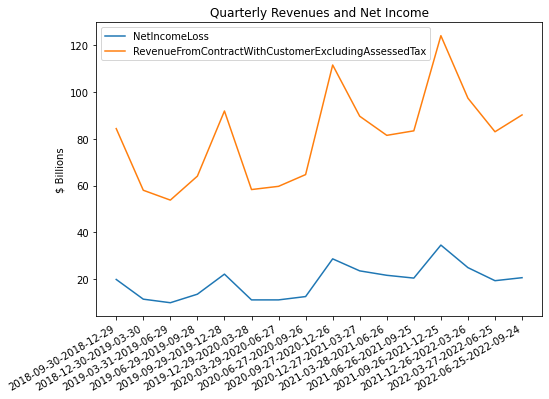

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

# custom y axis formatter
def format_dollars(y, pos=None):
    return int(y/1000000000)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = qrt_income_statement.astype(float)\
                         .loc["NetIncomeLoss"]\
                         .plot.line(legend=True)
ax = qrt_income_statement.astype(float)\
                         .loc["RevenueFromContractWithCustomerExcludingAssessedTax"]\
                         .plot.line(legend=True)

ax.set_title('Quarterly Revenues and Net Income')

ax.yaxis.set_major_formatter(tick.FuncFormatter(format_dollars))

plt.ylabel('$ Billions')

# show all quarter date ranges
plt.xticks(ticks=np.arange(len(qrt_income_statement.columns)),
           labels=qrt_income_statement.columns)

# format x axis properly
fig.autofmt_xdate()

plt.show()

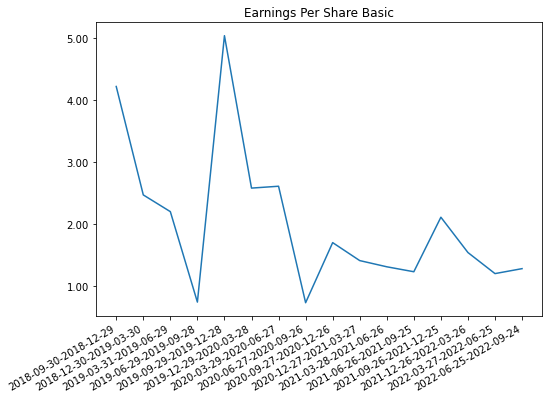

In [24]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = qrt_income_statement.astype(float).loc["EarningsPerShareBasic"].plot.line()

ax.set_title('Earnings Per Share Basic')

# use higher precision for y axis labels
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(ticks=np.arange(len(qrt_income_statement.columns)),
           labels=qrt_income_statement.columns)

# format x axis properly
fig.autofmt_xdate()

plt.show()

# AAPL